In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("D:\Maestría Big Data\Clases 1er Semestre\Métodos de Captura y Almacenamiento de Datos\Actividad 1 - Limpieza de Datos\dataset_banco.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [23]:
data.isnull().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

# Datos Faltantes

In [24]:
data1 = data.dropna() #data.dropna(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


# Columnas Irrelevantes

In [25]:
data1['contact'].astype('str').unique()

array(['unknown', 'cellular', 'telephone', 'phone', 'mobile'],
      dtype=object)

In [26]:
col = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

for n in col:
    print(f'La Columna {n}: tiene {data[n].nunique()} datos')

La Columna age: tiene 85 datos
La Columna job: tiene 18 datos
La Columna marital: tiene 6 datos
La Columna education: tiene 10 datos
La Columna default: tiene 2 datos
La Columna balance: tiene 7168 datos
La Columna housing: tiene 2 datos
La Columna loan: tiene 6 datos
La Columna contact: tiene 5 datos
La Columna day: tiene 31 datos
La Columna month: tiene 12 datos
La Columna duration: tiene 1575 datos
La Columna campaign: tiene 48 datos
La Columna pdays: tiene 559 datos
La Columna previous: tiene 41 datos
La Columna poutcome: tiene 6 datos
La Columna y: tiene 2 datos


In [27]:
#No hay colunas con un mismo valor, al menos tienen dos diferentes

In [28]:
data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [29]:
#No hay columnas irrelevantes, si std(desviacion estandar) = 0 , todos los valores son exactamente iguales

# Filas Repetidas

In [30]:
col = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

for n in col: 
    duplicados = data1[n].duplicated() #obtener valores duplicados 
    indices = np.where([duplicados== True])[1] #obtener indices de duplicados
    
    print(f'La Columna {n}: tiene {duplicados.sum()} valores duplicados')
    
    
data1['age'].value_counts() #contar los valores que tiene 

La Columna age: tiene 45122 valores duplicados
La Columna job: tiene 45189 valores duplicados
La Columna marital: tiene 45201 valores duplicados
La Columna education: tiene 45197 valores duplicados
La Columna default: tiene 45205 valores duplicados
La Columna balance: tiene 38039 valores duplicados
La Columna housing: tiene 45205 valores duplicados
La Columna loan: tiene 45201 valores duplicados
La Columna contact: tiene 45202 valores duplicados
La Columna day: tiene 45176 valores duplicados
La Columna month: tiene 45195 valores duplicados
La Columna duration: tiene 43634 valores duplicados
La Columna campaign: tiene 45159 valores duplicados
La Columna pdays: tiene 44648 valores duplicados
La Columna previous: tiene 45166 valores duplicados
La Columna poutcome: tiene 45201 valores duplicados
La Columna y: tiene 45205 valores duplicados


32     2083
31     1995
33     1971
34     1930
35     1894
       ... 
399       1
311       1
776       1
332       1
490       1
Name: age, Length: 85, dtype: int64

In [31]:
duplicados.sum()

45205

In [32]:
#Eliminar filas 

data2 = data1.drop_duplicates()
print(data1.shape, data2.shape)

(45207, 17) (45203, 17)


In [33]:
#Se eliminaron 5 filas iguales

# Outliers

In [34]:
#valores extremos verificarlos 

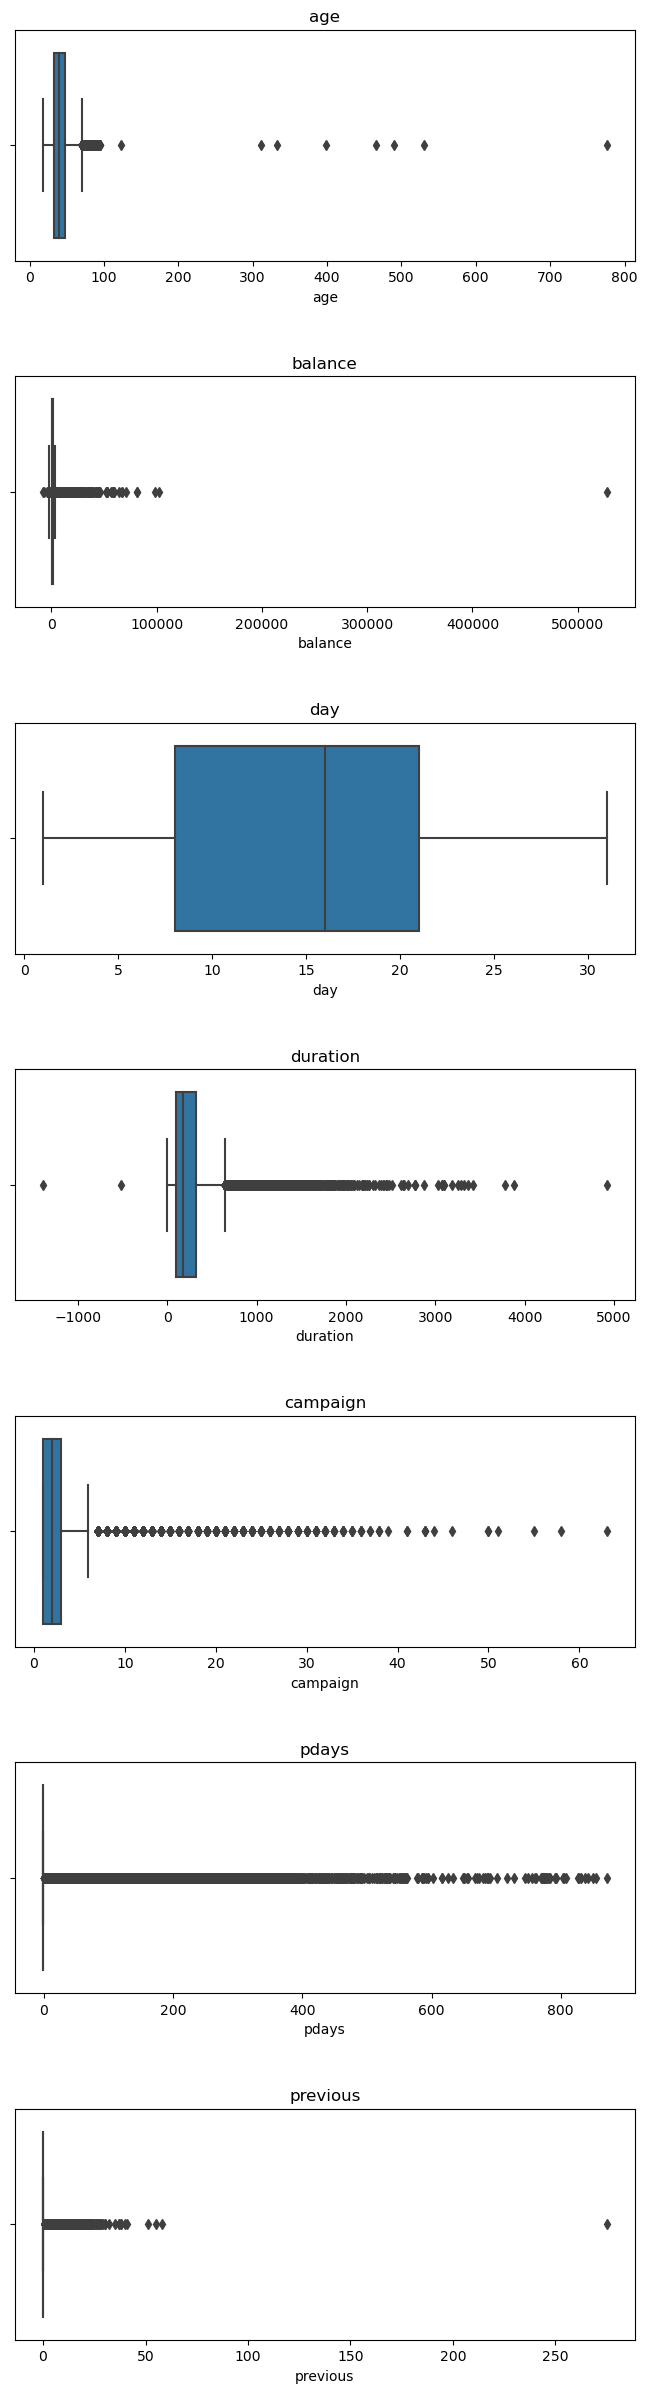

In [35]:
col = ['age','balance','day','duration','campaign','pdays','previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5) 

for i, cols in enumerate (col):
    sns.boxplot(x=cols, data=data2, ax=ax[i])
    ax[i].set_title(cols)

In [36]:
#enfocar en columnas:
#edad > 100
#duracion < 0 
#previous > 100

In [37]:
data3 =data2[data2['age']<=100] #quedate las menores o iguales a 100
print(data2.shape, data3.shape)

(45203, 17) (45195, 17)


In [38]:
data4 =data3[data3['duration']>0] #quedate las mayores a 0
print(data3.shape, data4.shape)

(45195, 17) (45190, 17)


In [39]:
data5 =data4[data4['previous']<=100] #quedate las mayores a 0
print(data4.shape, data5.shape)

(45190, 17) (45189, 17)


# Errores tipograficos en variables categoricas

In [40]:
col = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact','month', 'poutcome', 'y']

for n in col:
    print(data5[n].astype('str').unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']
['married' 'single' 'div.' 'divorced' 'DIVORCED' 'Single']
['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK']
['no' 'yes']
['yes' 'no']
['no' 'yes' 'No' 'YES' 'Yes' 'NO']
['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['may' 'nov' 'jun' 'jul' 'aug' 'oct' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'UNK' 'failure' 'other' 'success' 'Success']
['no' 'yes']


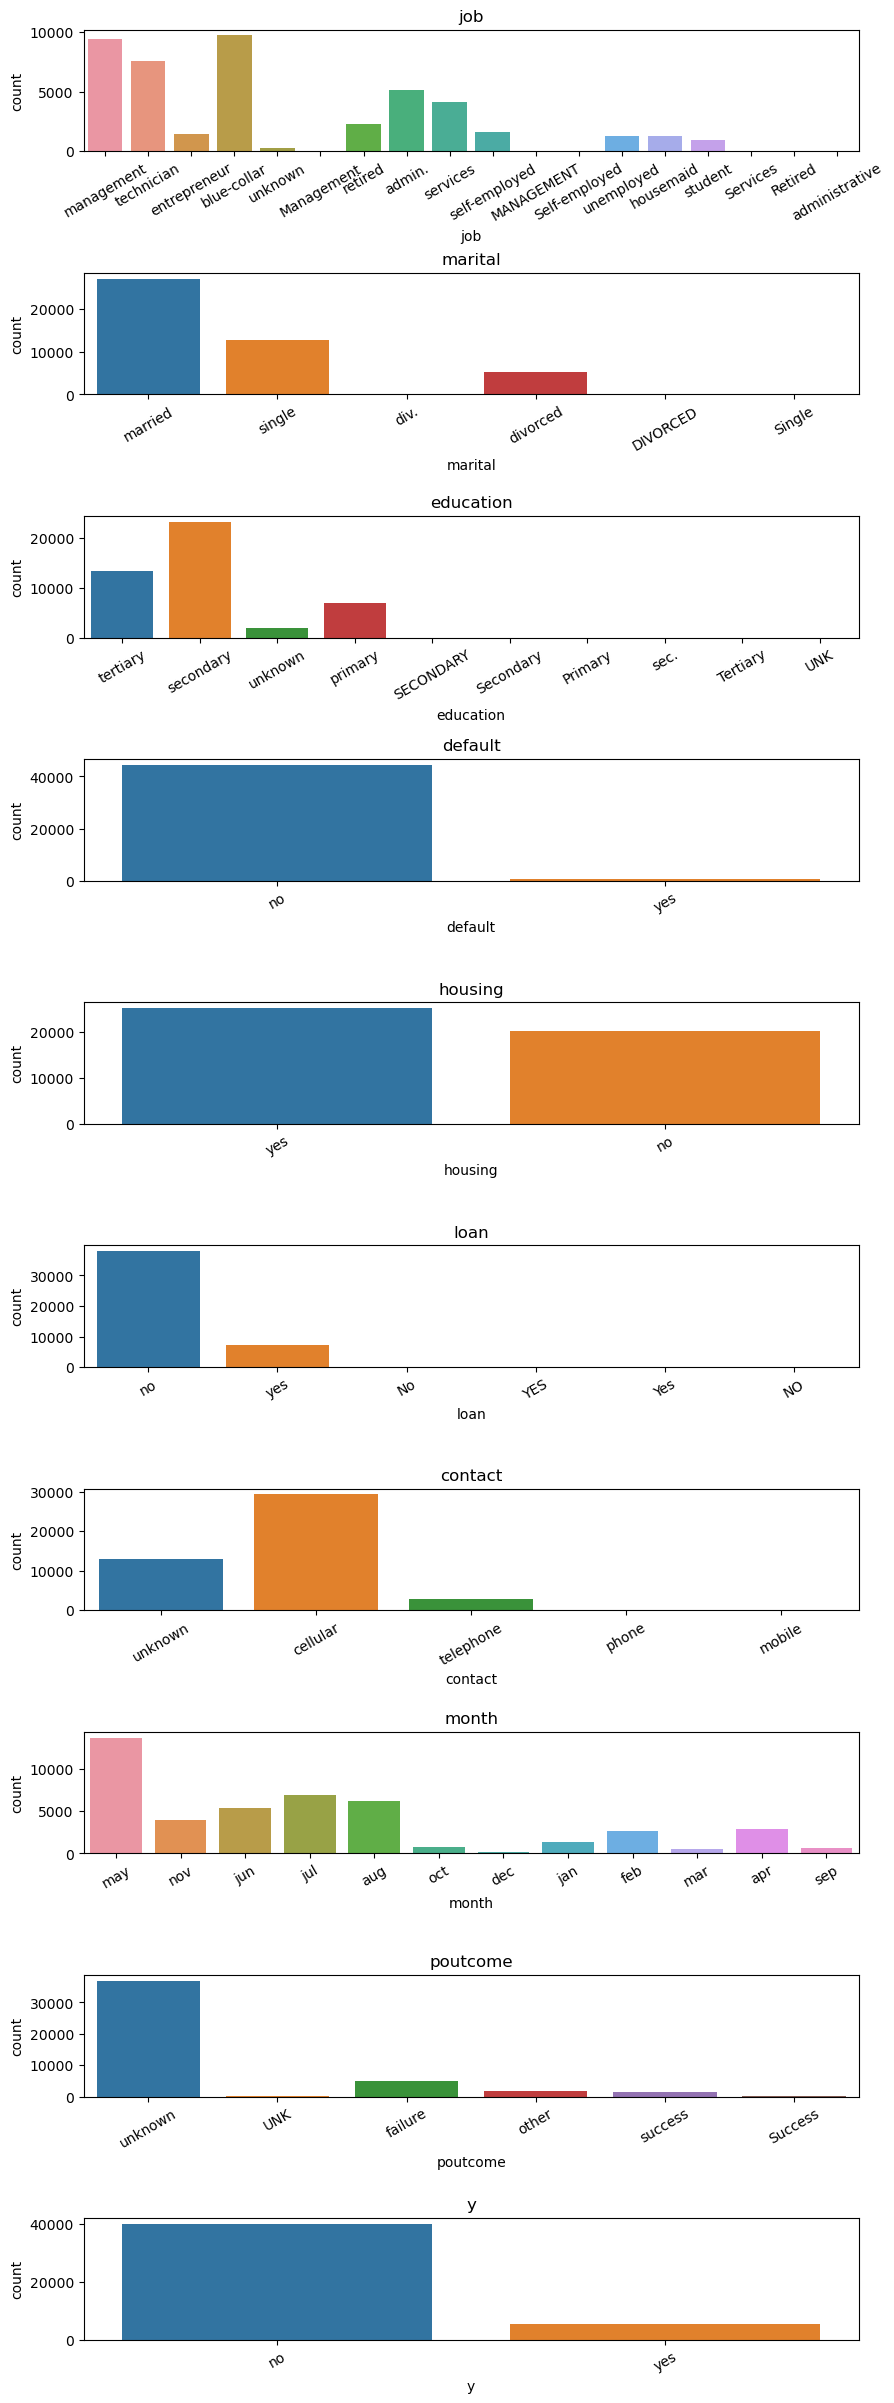

In [41]:
col = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact','month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1) 

for i, cols in enumerate (col):
    sns.countplot(x=cols, data=data5, ax=ax[i])
    ax[i].set_title(cols)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [42]:
#colocar todo en minusculas

col = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact','month', 'poutcome', 'y']

for n in col:
    data5[n] = data5[n].str.lower()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\1859747602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5[n] = data5[n].str.lower()


In [43]:
col = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact','month', 'poutcome', 'y']

for column in data5.columns:
    if column in col:
        data5[column] = data5[column].str.lower()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\843298426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5[column] = data5[column].str.lower()


In [44]:
for n in col:
    print(data5[n].astype('str').unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['married' 'single' 'div.' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['may' 'nov' 'jun' 'jul' 'aug' 'oct' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'unk' 'failure' 'other' 'success']
['no' 'yes']


In [45]:
#unificar en job admin y administrative 
print(data5['job'].unique())
data5['job'] = data5['job'].str.replace('admin.', 'administrative', regex=False)
print(data5['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\3168426831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['job'] = data5['job'].str.replace('admin.', 'administrative', regex=False)


In [46]:
#unificar en maritial div = divorced
print(data5['marital'].unique())
#data5[data5['marital'] =='div.'] = 'divorced'
data5['marital'] = data5['marital'].str.replace('div.', 'divorced', regex=False)
print(data5['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\1063970618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['marital'] = data5['marital'].str.replace('div.', 'divorced', regex=False)


In [47]:
#unificar en eduaction = sec. secundary , unk unknown 
print(data5['education'].unique())
#data5[data5['education'] =='sec.'] = 'secondary'
#data5[data5['education'] =='unk'] = 'unknown'
data5['education'] = data5['education'].str.replace('sec.', 'secondary', regex=False)
data5['education'] = data5['education'].str.replace('unk', 'unknown', regex=False)
print(data5['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknownnown' 'primary' 'unknown']


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\3913474452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['education'] = data5['education'].str.replace('sec.', 'secondary', regex=False)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\3913474452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['education'] = data5['education'].str.replace('unk', 'unknown', regex=False)


In [48]:
#unificar poutcome
print(data5['poutcome'].unique())
data5['poutcome'] = data5['poutcome'].str.replace('unk', 'unknown', regex=False)
print(data5['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknownnown' 'unknown' 'failure' 'other' 'success']


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\1818875565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['poutcome'] = data5['poutcome'].str.replace('unk', 'unknown', regex=False)


In [49]:
#unificar contact
print(data5['contact'].unique())
data5['contact'] = data5['contact'].str.replace('phone', 'telephone', regex=False)
print(data5['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'teletelephone' 'telephone' 'mobile']


C:\Users\Pablo\AppData\Local\Temp\ipykernel_16304\2731491732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['contact'] = data5['contact'].str.replace('phone', 'telephone', regex=False)


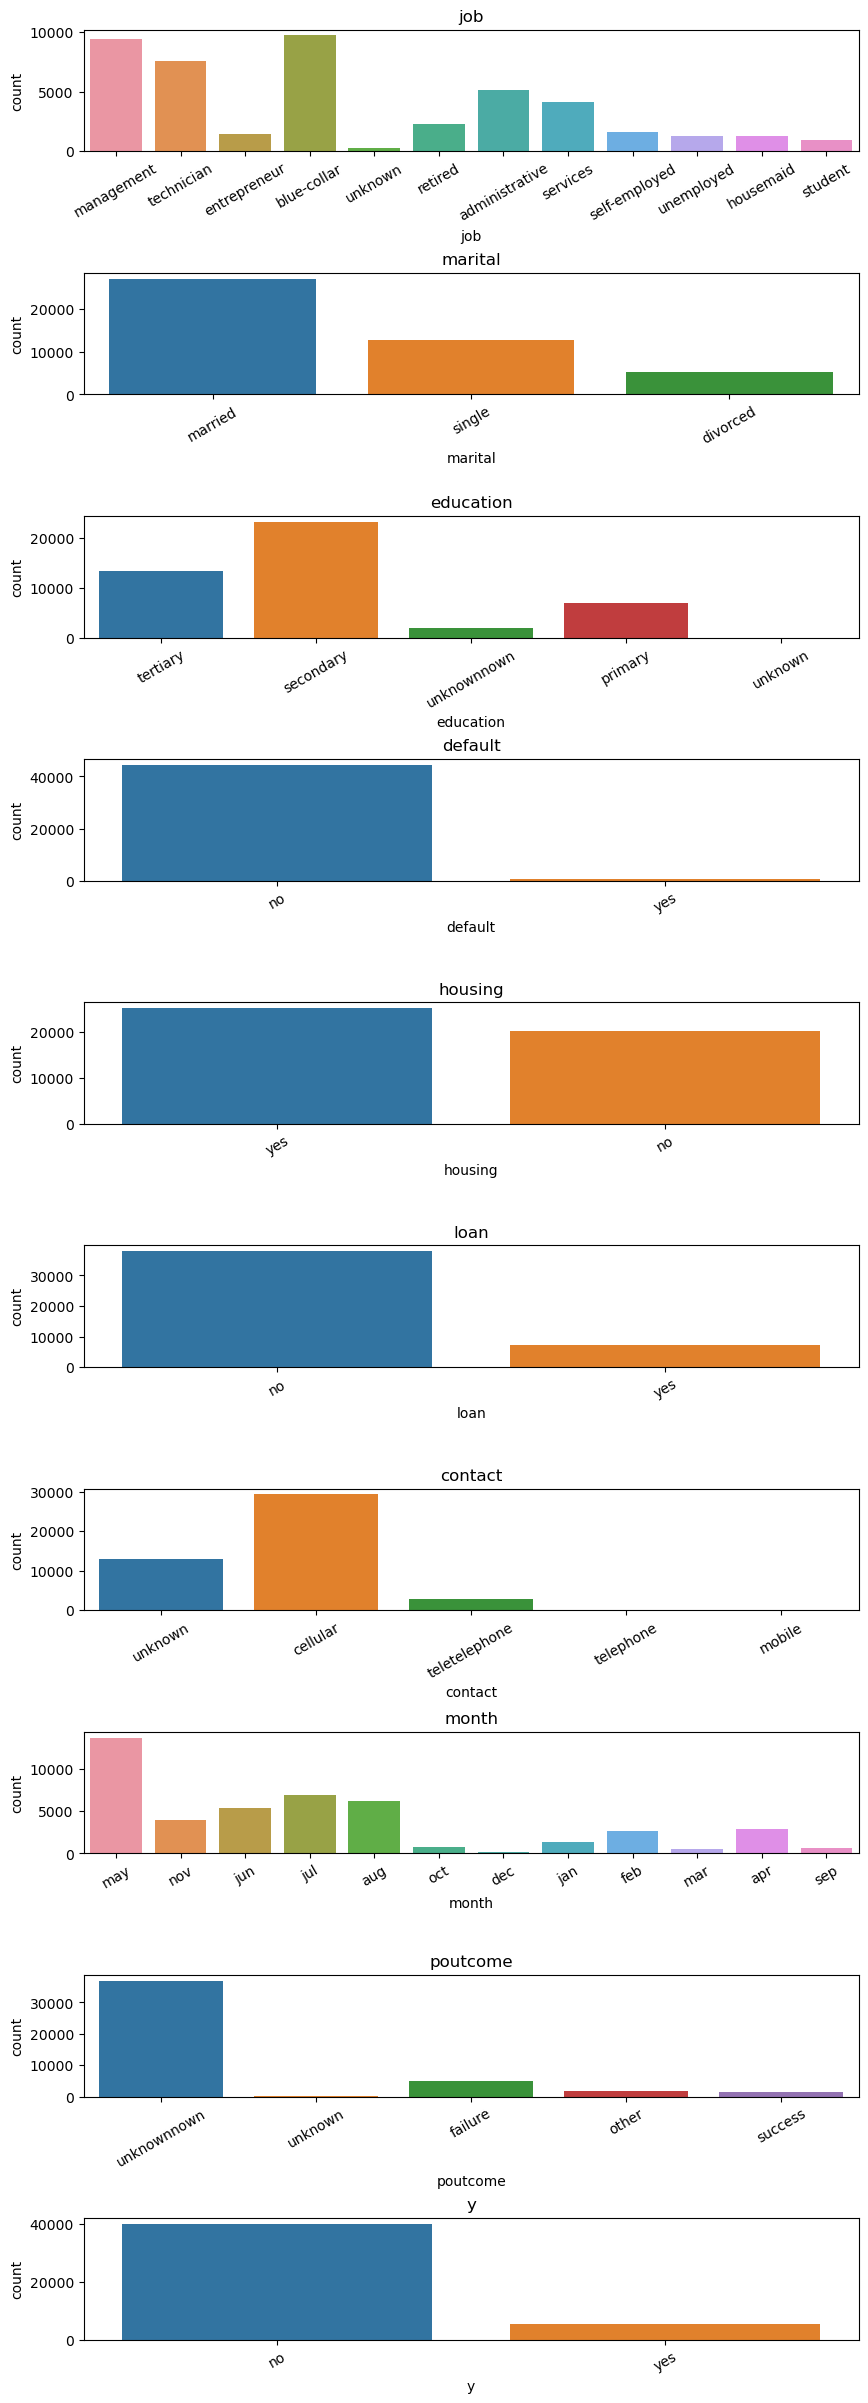

In [50]:
col = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact','month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1) 

for i, cols in enumerate (col):
    sns.countplot(x=cols, data=data5, ax=ax[i])
    ax[i].set_title(cols)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

# Trabajo con Fichero

In [36]:
fichero

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,NaN,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,NaN,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,NaN,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,NaN,Geo-Override


In [37]:
fichero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


In [38]:
fichero.describe()

,CrimeId,Range
count,1.005100e+04,0.0
mean,1.609394e+08,NaN
std,1.327006e+04,NaN
min,1.609033e+08,NaN
25%,1.609303e+08,NaN
50%,1.609408e+08,NaN
75%,1.609513e+08,NaN
max,1.609642e+08,NaN


In [39]:
col = ['CrimeId','OriginalCrimeTypeName','OffenseDate','CallTime','CallDateTime','Disposition','Address','City','State','AgencyId','Range','AddressType']

for n in col:
    print(f'La columna {n} tiene: {fichero[n].nunique()} datos diferentes')

La columna CrimeId tiene: 10047 datos diferentes
La columna OriginalCrimeTypeName tiene: 575 datos diferentes
La columna OffenseDate tiene: 9 datos diferentes
La columna CallTime tiene: 1416 datos diferentes
La columna CallDateTime tiene: 5116 datos diferentes
La columna Disposition tiene: 19 datos diferentes
La columna Address tiene: 5387 datos diferentes
La columna City tiene: 8 datos diferentes
La columna State tiene: 1 datos diferentes
La columna AgencyId tiene: 2 datos diferentes
La columna Range tiene: 0 datos diferentes
La columna AddressType tiene: 6 datos diferentes


In [40]:
fichero['AgencyId'].unique()

array(['1', 'CA'], dtype=object)

In [41]:
fichero['State'].unique()

array(['CA', nan], dtype=object)

In [42]:
fichero.count()

CrimeId                  10051
OriginalCrimeTypeName    10051
OffenseDate              10051
CallTime                 10051
CallDateTime             10051
Disposition              10051
Address                  10051
City                      9730
State                    10048
AgencyId                 10051
Range                        0
AddressType              10051
dtype: int64

In [43]:
fichero['AgencyId'].duplicated().sum()

10049

In [44]:
fichero['AgencyId'].value_counts()

1     10048
CA        3
Name: AgencyId, dtype: int64

In [45]:
duplicados = fichero['CrimeId'].duplicated()

indices = np.where([duplicados == True])[1]

fichero.loc[indices]

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
1707,160913455,Susp,2016-04-01T00:00:00,18:29,2016-04-01T18:29:00,GOA,Geary St/larkin St,San Francisco,CA,1,NaN,Intersection
3792,160913455,Passing Call,2016-04-02T00:00:00,17:11,2016-04-02T17:11:00,Not recorded,900 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
7046,160950496,Suspicious Vehicle,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,ND,1400 Block Of Cabrillo St,San Francisco,CA,1,NaN,Premise Address
7047,160950496,Trespasser,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,CAN,Block Of Hampshire St,San Francisco,CA,1,NaN,Premise Address


In [46]:
fichero['Disposition'].unique()

array(['REP', 'GOA', 'ADV', 'HAN', 'ND', 'ARR', 'UTL', 'Not recorded',
       'CIT', 'PAS', 'ABA', 'NOM', 'ADM', 'CAN', 'INC', 'NCR', '22',
       'CRT', 'SFD'], dtype=object)

In [47]:
fichero2 = fichero

fichero2 = fichero2.drop(['Range'],axis=1)


In [48]:
fichero2['State'] = fichero2['State'].fillna('CA')

In [49]:
fichero2['State'].unique()

array(['CA'], dtype=object)

In [50]:
fichero2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CrimeId                10051 non-null  int64 
 1   OriginalCrimeTypeName  10051 non-null  object
 2   OffenseDate            10051 non-null  object
 3   CallTime               10051 non-null  object
 4   CallDateTime           10051 non-null  object
 5   Disposition            10051 non-null  object
 6   Address                10051 non-null  object
 7   City                   9730 non-null   object
 8   State                  10051 non-null  object
 9   AgencyId               10051 non-null  object
 10  AddressType            10051 non-null  object
dtypes: int64(1), object(10)
memory usage: 863.9+ KB


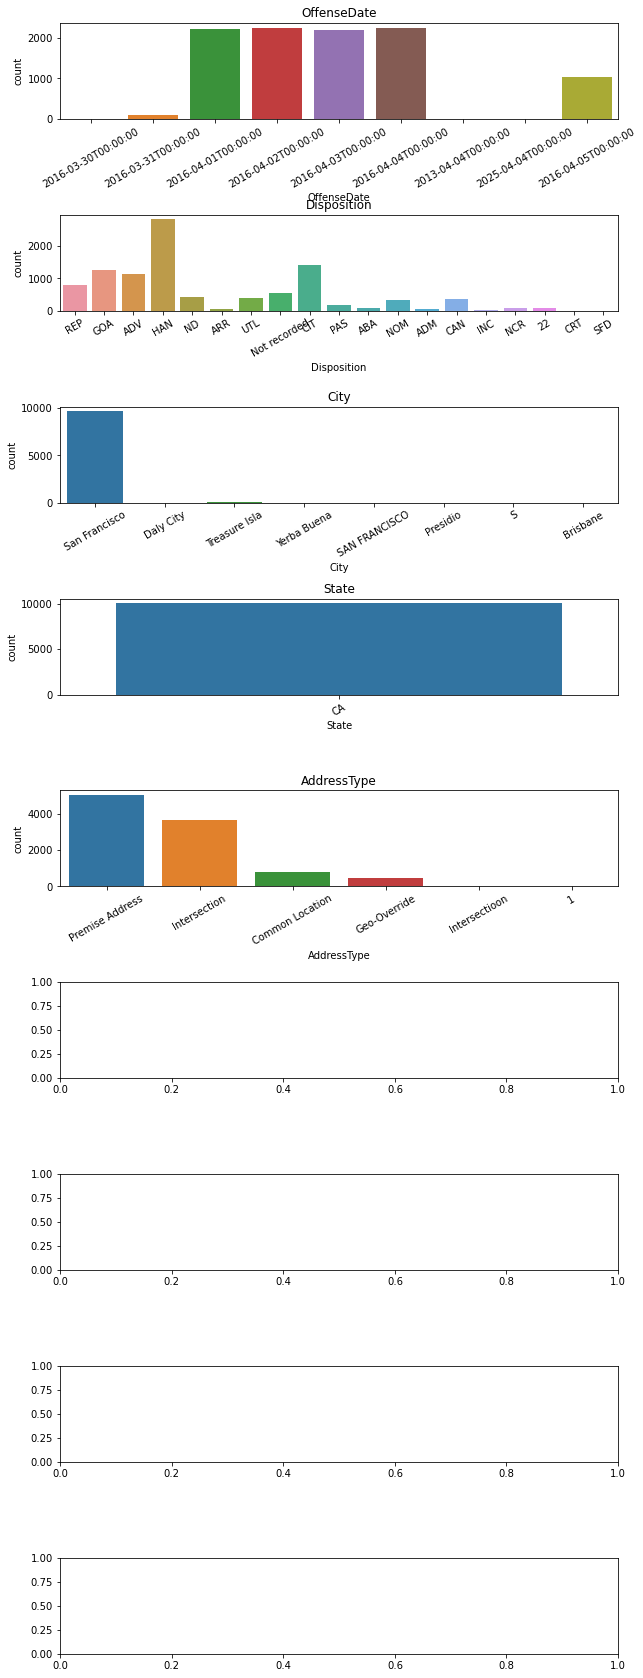

In [51]:
col = ['OffenseDate','Disposition','City','State','AddressType']

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1) 

for i, cols in enumerate (col):
    sns.countplot(x=cols, data=fichero2, ax=ax[i])
    ax[i].set_title(cols)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [54]:
fichero2['City'] = fichero2['City'].str.lower()

In [57]:
fichero2['City'].unique()

array(['san francisco', nan, 'daly city', 'treasure isla', 'yerba buena',
       'presidio', ' s', 'brisbane'], dtype=object)

In [58]:
fichero2['City'] = fichero2['City'].fillna(method='bfill', axis=0)

In [63]:
fichero2[fichero2['AddressType'] == 'Intersectioon'] = 'Intersection'

In [64]:
fichero2['AddressType'].unique()

array(['Premise Address', 'Intersection', 'Common Location',
       'Geo-Override', '1'], dtype=object)

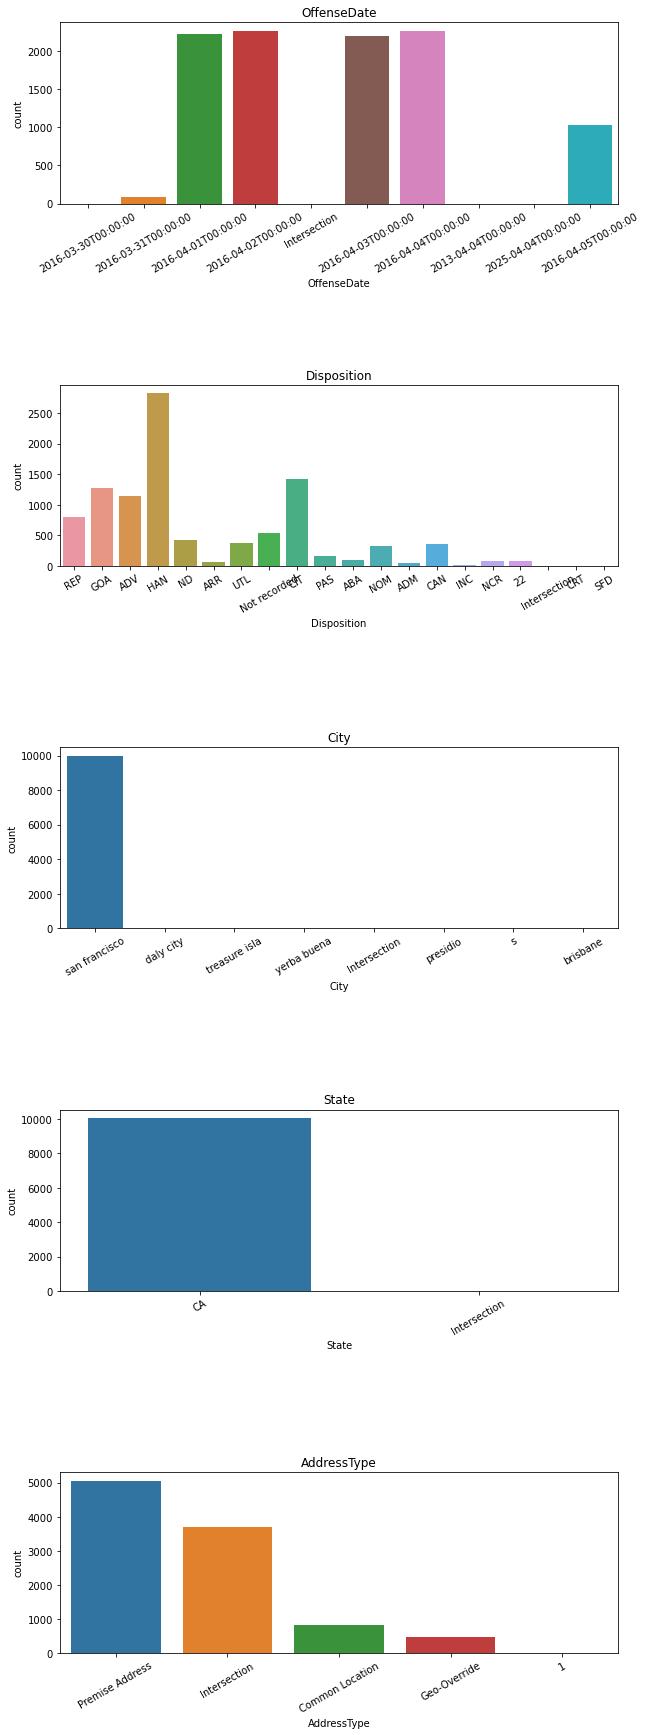

In [65]:
col = ['OffenseDate','Disposition','City','State','AddressType']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1) 

for i, cols in enumerate (col):
    sns.countplot(x=cols, data=fichero2, ax=ax[i])
    ax[i].set_title(cols)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [5]:
a = fichero.to_json("data_act_01.json")

In [6]:
b = fichero.to_csv("data_act_01.csv")

In [8]:
c = pd.read_csv("data_act_01.csv",sep=',')
c.head(5)

,Unnamed: 0,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection


In [9]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10051 non-null  int64  
 1   CrimeId                10051 non-null  int64  
 2   OriginalCrimeTypeName  10051 non-null  object 
 3   OffenseDate            10051 non-null  object 
 4   CallTime               10051 non-null  object 
 5   CallDateTime           10051 non-null  object 
 6   Disposition            10051 non-null  object 
 7   Address                10051 non-null  object 
 8   City                   9730 non-null   object 
 9   State                  10048 non-null  object 
 10  AgencyId               10051 non-null  object 
 11  Range                  0 non-null      float64
 12  AddressType            10051 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1020.9+ KB


In [10]:
d = fichero.head(5)

In [11]:
e = d.to_json("data_act_02.json")

In [12]:
d

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection


In [55]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

In [52]:
def primos(num):
    for n in range (2, num):
        if num % n == 0:
            return print("Es primo")
    print("no es primo")
    
    
    
primos(9)

Es primo
